In [294]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [295]:
train = pd.read_excel('train_nor_811.xlsx', index_col = 0)
valid = pd.read_excel('valid_nor_811.xlsx', index_col = 0)
test = pd.read_excel('test_nor_811.xlsx', index_col = 0)

In [296]:
train = train.append(valid)

In [297]:
train

,Emotion,Sentence
188,Other,cho mình xin bài nhạc tên là gì với ạ
166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...
1290,Sadness,nhọc lòng :(((
881,Sadness,tao đã rất muốn làm bạn tốt anh em tri kỉ với ...
1689,Disgust,cơm tấm ở ngoài cũng như này . 😡
1779,Surprise,chất liệu đỉnh quá


In [298]:
stopword = pd.read_csv('stopword.txt', header=None)
stopword[0] = stopword[0].apply(lambda x: x.replace('_', ' '))
stopwords = stopword[0].to_list()
stopwords

['cho',
 'chú thích',
 'các',
 'còn',
 'có',
 'cũng',
 'của',
 'dân số',
 'hai',
 'hoa',
 'họ',
 'introduction',
 'khi',
 'khoa học',
 'không',
 'liên kết',
 'loài',
 'là',
 'làm',
 'miêu tả',
 'mô tả',
 'một',
 'ngoài',
 'ngày',
 'người',
 'nhiều',
 'như',
 'nhất',
 'những',
 'này',
 'nó',
 'năm',
 'ra',
 'sau',
 'tham khảo',
 'theo',
 'thuộc',
 'tháng',
 'thêm',
 'thể loại',
 'thực vật',
 'trong',
 'trên',
 'tên',
 'tại',
 'tỉnh',
 'từ',
 'và',
 'vào',
 'về',
 'với',
 'xem',
 'đã',
 'đó',
 'được',
 'đầu tiên',
 'đến',
 'để']

In [299]:
def text_process(mess):

    regrex_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  
                u"\U0001F300-\U0001F5FF"  
                u"\U0001F680-\U0001F6FF"  
                u"\U0001F1E0-\U0001F1FF"  
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    mess = regrex_pattern.sub(r"",mess)
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords and len(word) < 7])

In [300]:
mapper = {'Disgust': 0, 'Enjoyment': 1, 'Anger': 2, 'Surprise': 3, 'Sadness': 4 , 'Fear': 5, 'Other': 6}
train['Emotion'] = train['Emotion'].map(mapper)
test['Emotion'] = test['Emotion'].map(mapper)
test

,Emotion,Sentence
713,4,người ta có bạn bè nhìn vui thật
1827,3,cho nghỉ viêc mói đúng sao goi là kỷ luật
1166,0,kinh vãi 😡
228,5,nhà thì không xa lắm nhưng chưa bao giờ đi vì ...
1942,2,bố không thích nộp đấy mày thích ý kiến không
...,...,...
432,4,lúc thì cuốc đất è cổ ra không có giun mà câu ...
178,1,các bác dẫn crush qua cây sữa nay mà hứng nước...
1863,3,vợ chồng rồi mà trong sáng như này chỉ có tron...
476,6,bep này vào binh dương dùng xuất


In [301]:
train["Sentence"] = train["Sentence"].apply(lambda text: text_process(text))
test["Sentence"] = test["Sentence"].apply(lambda text: text_process(text))

In [302]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()  
features_train = tf.fit_transform(train['Sentence'])
features_test = tf.transform(test['Sentence'])
print(features_train.shape, features_test.shape)

(6234, 4204) (693, 4204)


In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(features_train, train['Emotion'])
predict = model.predict(features_test)

In [304]:
emotion_test = test['Emotion']
accuracy_score(emotion_test, predict)

0.5440115440115441

In [305]:
print(classification_report(emotion_test, predict))

              precision    recall  f1-score   support

           0       0.51      0.62      0.56       132
           1       0.55      0.71      0.62       193
           2       0.53      0.23      0.32        40
           3       0.75      0.16      0.27        37
           4       0.62      0.48      0.54       116
           5       0.91      0.46      0.61        46
           6       0.47      0.51      0.49       129

    accuracy                           0.54       693
   macro avg       0.62      0.45      0.49       693
weighted avg       0.57      0.54      0.53       693



# BIỂU ĐỒ CỦA CÁC DATA

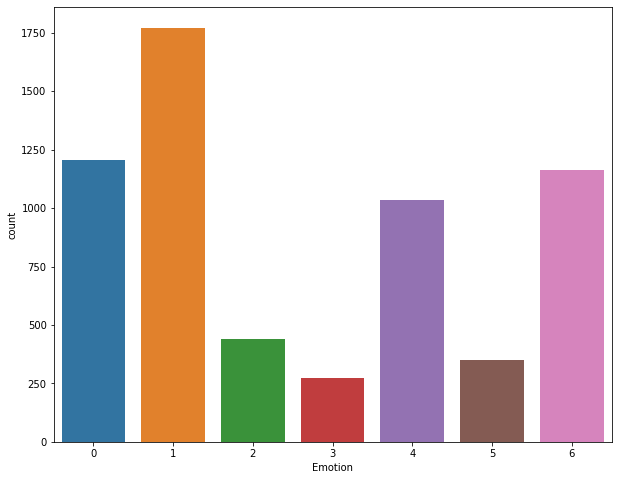

In [306]:
#train data
plt.figure(figsize = (10,8))
sns.countplot(train['Emotion'])
plt.show()

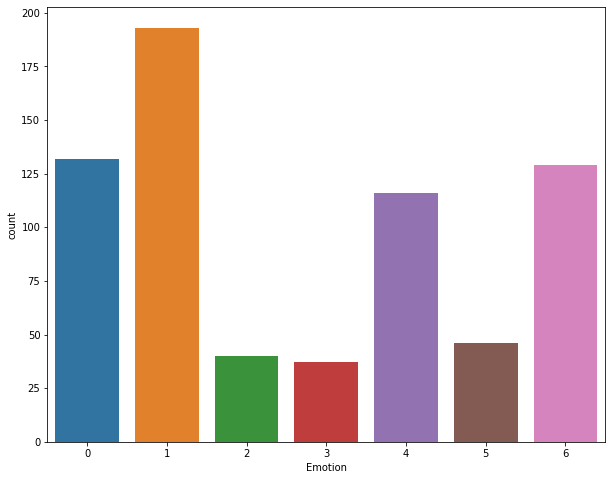

In [307]:
#test data
plt.figure(figsize = (10,8))
sns.countplot(test['Emotion'])
plt.show()

##DÙNG COMMENT CRAWL TỪ YOUTUBE APPLY VÀO MODEL

In [316]:
data1 = pd.read_csv('data1.csv', index_col=0)
data2 = pd.read_csv('data2.csv', index_col=0)
data3 = pd.read_csv('data3.csv', index_col=0)

In [317]:
data1.rename(columns = {'emotion': 'Emotion', 'comment': 'Sentence'}, inplace = True)
data2.rename(columns = {'emotion': 'Emotion', 'comment': 'Sentence'}, inplace = True)
data3.rename(columns = {'emotion': 'Emotion', 'comment': 'Sentence'}, inplace = True)

In [318]:
data_ = data1.append(data2)
data_ = data_.append(data3)
data_

,Emotion,Sentence
stt,,
1,Sadness,Thời gian khá gấp nên chưa đã lắm đúng không c...
2,Enjoyment,Hay mà
3,Enjoyment,Hay lắm
4,Enjoyment,Tập này Vinh hay
5,Enjoyment,Hay mà đâu tệ
...,...,...
96,Other,Nghe rap được bao lâu r
97,Disgust,Duy Nguyễn hất hàm hỏi ai đấy em
98,Other,Hoang Anh bạn bày tỏ í kiến và lắng nghe người...


In [319]:
data_["Sentence"] = data_["Sentence"].apply(lambda text: text_process(text))

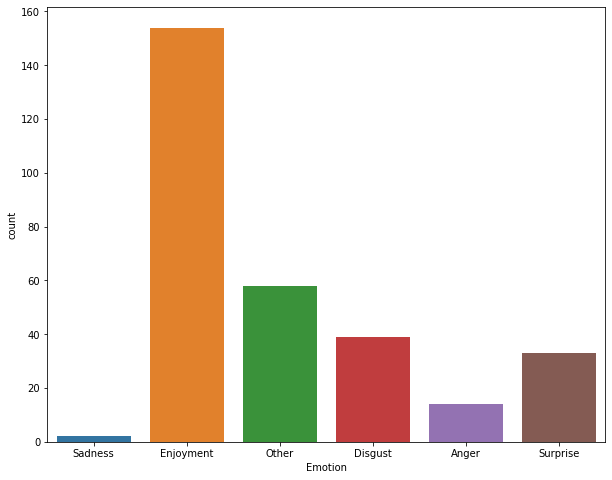

In [320]:
#test data
plt.figure(figsize = (10,8))
sns.countplot(data_['Emotion'])
plt.show()

In [321]:
features_data_ = tf.transform(data_['Sentence'])
features_data_.shape

(300, 4204)

In [322]:
data_['Emotion'] = data_['Emotion'].map(mapper)

In [323]:
predict = model.predict(features_data_)

In [324]:
emotion_data_ = data_['Emotion']
print(classification_report(emotion_data_, predict))
accuracy_score(emotion_data_, predict)

              precision    recall  f1-score   support

           0       0.35      0.33      0.34        39
           1       0.62      0.78      0.69       154
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         2
           6       0.34      0.34      0.34        58

    accuracy                           0.51       300
   macro avg       0.22      0.24      0.23       300
weighted avg       0.43      0.51      0.47       300



0.51